In [2]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e077600bbff25275f30ed6f15f6e1511e8c9a70ace1465d35012d06231690a76
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

In [5]:
df = pd.read_excel('Вхідні дані Лабораторна 4.xlsx')
df.head()

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу,Рівень автоматизації,Плинність кадрів
0,1,40.63,3.36,0.70,0.33,низький,висока
1,1,34.11,3.07,0.78,0.32,низький,середня
2,1,33.61,3.45,0.67,0.35,низький,середня
3,1,28.32,3.95,0.68,0.38,середній,висока
4,1,35.13,3.43,0.65,0.35,низький,висока


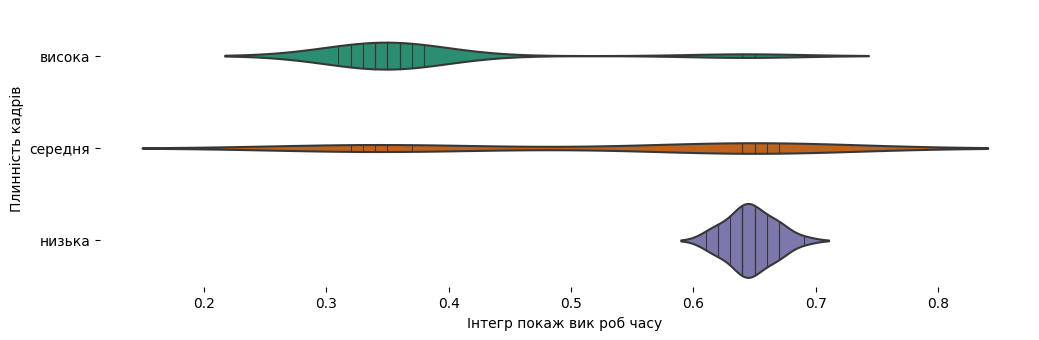

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Плинність кадрів'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Інтегр покаж вик роб часу', y='Плинність кадрів', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
profile = ProfileReport(df, title="EDA (лабораторна робота №4)")
profile.to_notebook_iframe()
profile.to_file("EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

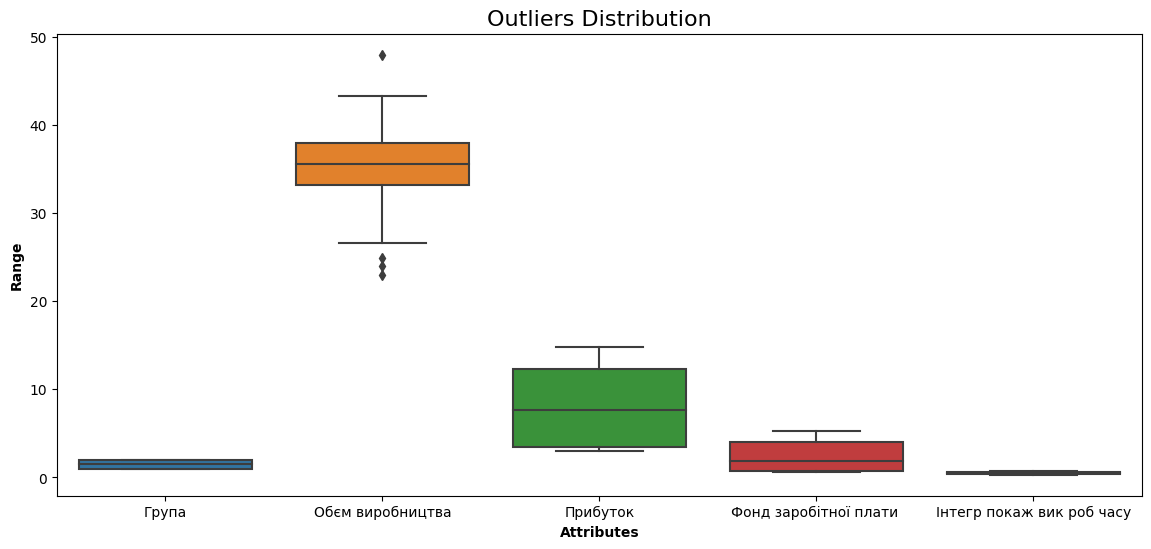

In [8]:
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(df)

In [9]:
df

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу,Рівень автоматизації,Плинність кадрів
0,1,40.63,3.36,0.70,0.33,низький,висока
1,1,34.11,3.07,0.78,0.32,низький,середня
2,1,33.61,3.45,0.67,0.35,низький,середня
3,1,28.32,3.95,0.68,0.38,середній,висока
4,1,35.13,3.43,0.65,0.35,низький,висока
...,...,...,...,...,...,...,...
75,2,39.30,12.55,4.28,0.65,середній,низька
76,2,37.55,11.92,4.43,0.67,середній,середня
77,2,37.76,11.27,3.69,0.62,середній,низька
78,2,41.52,11.78,3.94,0.64,низький,висока


In [10]:
df.iloc[:, 5]

0      низький
1      низький
2      низький
3     середній
4      низький
        ...   
75    середній
76    середній
77    середній
78     низький
79    середній
Name: Рівень автоматизації, Length: 80, dtype: object

In [11]:
pd.factorize( df.iloc[:, 5] )[0]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1])

In [12]:
df.iloc[:, 5] = pd.factorize( df.iloc[:, 5] )[0]

<ipython-input-12-fdd8647a1e05>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 5] = pd.factorize( df.iloc[:, 5] )[0]


In [13]:
df.iloc[:, 6] = pd.factorize( df.iloc[:, 6] )[0]

<ipython-input-13-6b741eeae40d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 6] = pd.factorize( df.iloc[:, 6] )[0]


In [14]:
df.head()

,Група,Обєм виробництва,Прибуток,Фонд заробітної плати,Інтегр покаж вик роб часу,Рівень автоматизації,Плинність кадрів
0,1,40.63,3.36,0.70,0.33,0,0
1,1,34.11,3.07,0.78,0.32,0,1
2,1,33.61,3.45,0.67,0.35,0,1
3,1,28.32,3.95,0.68,0.38,1,0
4,1,35.13,3.43,0.65,0.35,0,0


In [15]:
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df)
scaled_data[0:3]

array([[-1.        ,  1.23042978, -1.01217429, -0.99552879, -1.11018919,
        -1.02899151, -0.99655765],
       [-1.        , -0.25640486, -1.0755701 , -0.94976722, -1.17651864,
        -1.02899151,  0.17586311],
       [-1.        , -0.37042592, -0.99249972, -1.01268938, -0.97753028,
        -1.02899151,  0.17586311]])

In [16]:
kmeans2 = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans2.fit(scaled_data)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [17]:
davies_bouldin_score(scaled_data, kmeans2.fit_predict(scaled_data))

0.5040751122408373

In [18]:
kmeans3 = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans3.fit(scaled_data)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [19]:
davies_bouldin_score(scaled_data, kmeans3.fit_predict(scaled_data))

0.987928565315728

In [20]:
kmeans4 = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans4.fit(scaled_data)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [21]:
davies_bouldin_score(scaled_data, kmeans4.fit_predict(scaled_data))

1.1447786300813587

In [23]:
kmeans5 = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans5.fit(scaled_data)

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [24]:
davies_bouldin_score(scaled_data, kmeans5.fit_predict(scaled_data))

1.0677618607749202

In [25]:
kmeans6 = KMeans(n_clusters = 6, random_state = 0, n_init='auto')
kmeans6.fit(scaled_data)

KMeans(n_clusters=6, n_init='auto', random_state=0)

In [26]:
davies_bouldin_score(scaled_data, kmeans6.fit_predict(scaled_data))

0.9578375510315102

In [27]:
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")
ward_clustering = linkage(scaled_data, method="ward", metric="euclidean")

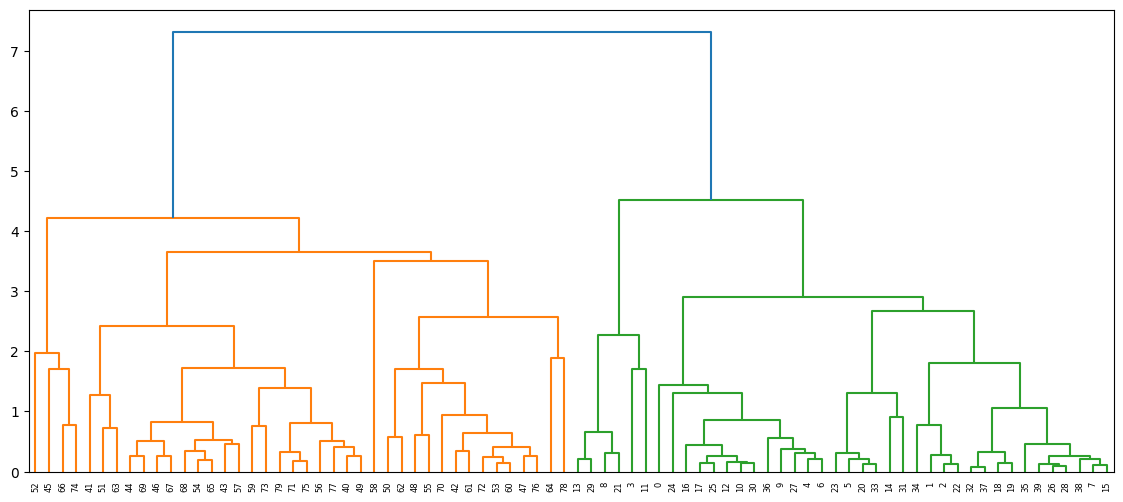

In [28]:
dendrogram(complete_clustering)
plt.show()

In [30]:
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=2, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=3, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=4, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=5, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(complete_clustering, t=6, criterion='maxclust')))

0.5040751122408373
0.8343167389299034
1.0354192513660667
1.019108414063185
0.8593001652058664


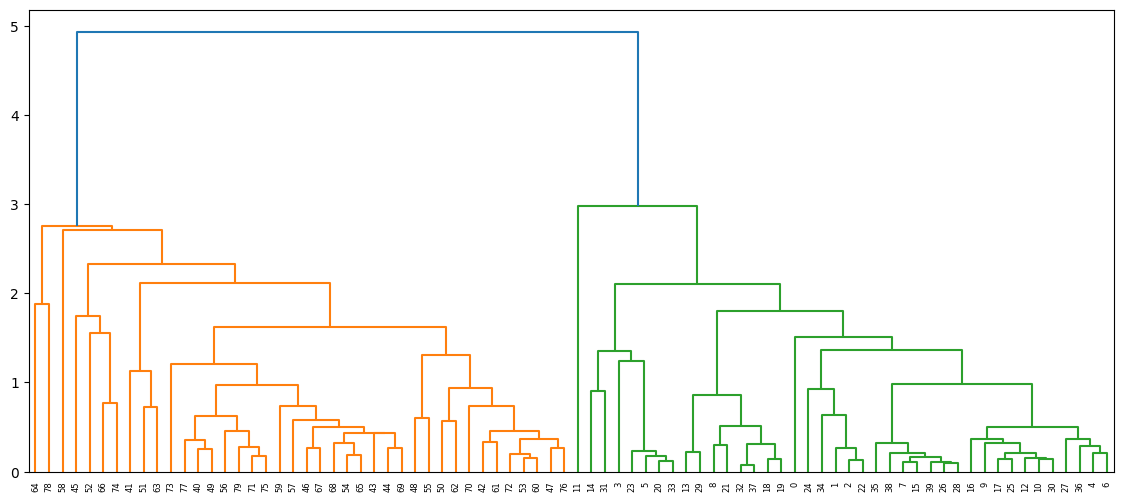

In [31]:
dendrogram(average_clustering)
plt.show()

In [32]:
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=2, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=3, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=4, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=5, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(average_clustering, t=6, criterion='maxclust')))

0.5040751122408373
0.4561290015015411
0.6537868637653866
0.6015339925428693
0.6740107476789636


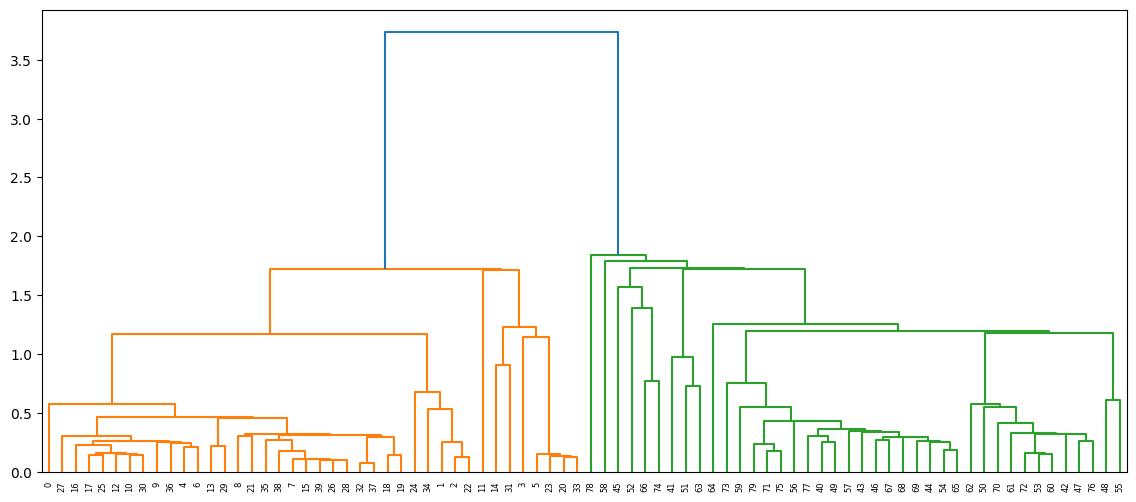

In [33]:
dendrogram(single_clustering)
plt.show()

In [34]:
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=2, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=3, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=4, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=5, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(single_clustering, t=6, criterion='maxclust')))

0.5040751122408373
0.47297615018335737
0.4621841937619478
0.6629611905382002
0.6853563770638558


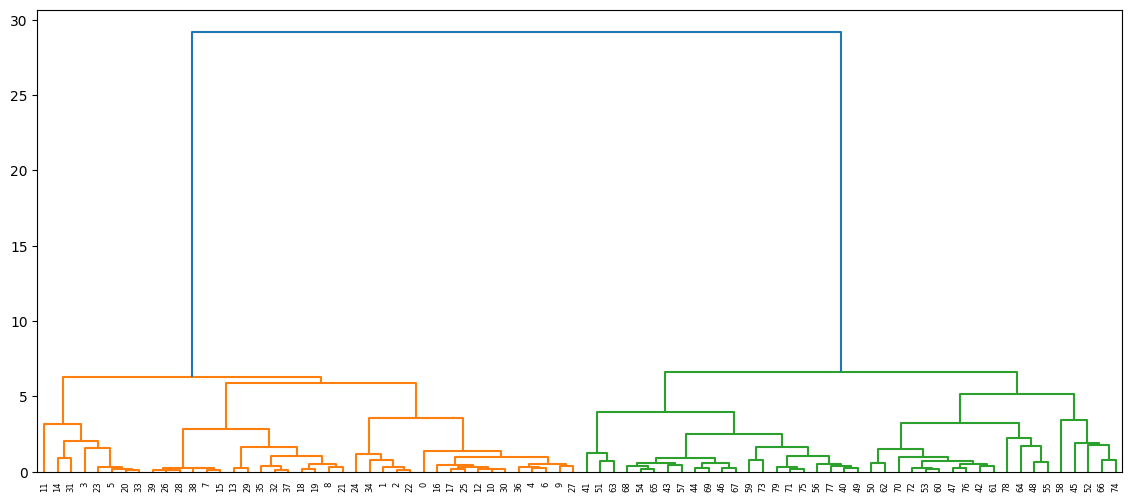

In [35]:
dendrogram(ward_clustering)
plt.show()

In [36]:
print(davies_bouldin_score(scaled_data, fcluster(ward_clustering, t=2, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(ward_clustering, t=3, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(ward_clustering, t=4, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(ward_clustering, t=5, criterion='maxclust')))
print(davies_bouldin_score(scaled_data, fcluster(ward_clustering, t=6, criterion='maxclust')))

0.5040751122408373
1.0277129130474667
1.1701691148987545
1.0144850140296433
0.9550929857379667
